# Introdução às estruturas de dados do Pandas

In [1]:
import numpy as np
import pandas as pd

## Séries ``series``

O tipo de estrutura ``series`` é um array com rótulos de 1 dimensão e é capaz de conter qualquer tipo de dado do Python. Os rótulos são chamados de índices (``index``). O método mais básico para criar uma série do pandas é:

```python
>>> s = pd.Series(data=dados, index=indice)
```

O parâmetro ``dados`` pode ser de diferentes tipos:
- Lista do Python
- Dicionário do Python
- ND-Array
- Valor escalar

O indice é um rótulo/nome para cada linha.

Dado essa tabela do IBGE de 2020, vamos construir uma série do pandas:

| Classe | Renda Familiar (Limite inferior)|
|:-------:|:----------------------------:|
| A      | 20.900       |
| B      | 10.450|
| C      | 4.180 |
| D      | 2.090  |
| E      | 0                |

### Série: a partir de uma lista

In [2]:
dados = [20900,10450,4180,2090,0]
classeSocialSemIndex = pd.Series(dados)
classeSocialSemIndex

0    20900
1    10450
2     4180
3     2090
4        0
dtype: int64

In [3]:
classeSocialSemIndex = pd.Series([20900,10450,4180,2090,0])
classeSocialSemIndex

0    20900
1    10450
2     4180
3     2090
4        0
dtype: int64

In [4]:
classeSocialSemIndex[0]

np.int64(20900)

In [5]:
classeSocialSemIndex.index

RangeIndex(start=0, stop=5, step=1)

In [6]:
classeSocialComIndex = pd.Series([20900, 10450, 4180, 2090, 0],
                                 index=['A', 'B', 'C', 'D', 'E'])
classeSocialComIndex

A    20900
B    10450
C     4180
D     2090
E        0
dtype: int64

In [7]:
classeSocialComIndex['A']

np.int64(20900)

In [8]:
classeSocialComIndex.values

array([20900, 10450,  4180,  2090,     0])

In [9]:
# do tipo pd.Index
classeSocialComIndex.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [10]:
classeSocialComIndex['A':'C']

A    20900
B    10450
C     4180
dtype: int64

In [11]:
classeSocialComIndex = pd.Series([20900, 10450, 4180, 2090, 0],
                                 index=[10, 1, 3, 9, 8])
classeSocialComIndex

10    20900
1     10450
3      4180
9      2090
8         0
dtype: int64

In [12]:
classeSocialComIndex[8]

np.int64(0)

### Série: a partir de um dicionário

| Classe        | Renda Familiar (Limite inferior)|
|:-------:      |:-------------------------------:|
| classe_A       | 20.900                          |
| classe_B       | 10.450                          |
| classe_C       | 4.180                           |
| classe_D       | 2.090                           |
| classe_E       | 0                               |

In [13]:
classeSocialDict = {'classe_A': 20900,
                   'classe_B': 10450,
                   'classe_C': 4180,
                   'classe_D': 2090,
                   'classe_E': 0}
classeSocialSeries = pd.Series(classeSocialDict)
classeSocialSeries

classe_A    20900
classe_B    10450
classe_C     4180
classe_D     2090
classe_E        0
dtype: int64

In [14]:
classeSocialSeries['classe_C']

np.int64(4180)

In [15]:
classeSocialSeries['classe_C':'classe_E']

classe_C    4180
classe_D    2090
classe_E       0
dtype: int64

### Série: a partir de um NDArray

In [16]:
pd.Series(np.random.randn(5))

0   -0.988032
1    0.290627
2   -0.537987
3   -0.654679
4    1.161829
dtype: float64

### Série: a partir de um escalar

In [17]:
pd.Series(5, index=[0,1,2,3,4])

0    5
1    5
2    5
3    5
4    5
dtype: int64

## Pandas Dataframe

``DataFrame`` é uma estrutura de dados com rótulos de 2 dimensões, podendo ter  colunas de diferentes tipos. É comparável às tabelas do excel ou de bancos de dados. É a estrutura de dados do pandas mais usada.


### DataFrame: a partir de uma lista

In [18]:
pd.DataFrame([2,4,6,8,10])

,0
0,2
1,4
2,6
3,8
4,10


In [19]:
pd.DataFrame([2,4,6,8,10],
             columns=['par'])

,par
0,2
1,4
2,6
3,8
4,10


### DataFrame: a partir de um dicionário com lista

In [20]:
pd.DataFrame({'impar': [1,3,5,7,9]})

,impar
0,1
1,3
2,5
3,7
4,9


### DataFrame: a partir de um dicionário com 2 listas

In [21]:
pd.DataFrame({'impar': [1,3,5,7,9],
              'par': [2,4,6,8,10]})

,impar,par
0,1,2
1,3,4
2,5,6
3,7,8
4,9,10


| Estado           | População |  Área (m2)|
|:----------------:|:---------:|:-------:  |
| **Amazonas**         | 3.938.336 | 1.559.167 |
| **São Paulo**        | 44.396.484| 248.219   |
| **Bahia**            | 15.203.934| 564.760   |
| **Minas Gerais**     | 20.869.101| 586.521   |
| **Roraima**          | 505.665   | 223.644   |
| **Distrito Federal** | 2.914.830 | 5.760     |

### DataFrame: a partir de um dicionário com 1 série do pandas

In [22]:
popBrasilDict = {
    'Amazonas': 3938336,
    'São Paulo': 44396484,
    'Bahia': 15203934,
    'Minas Gerais': 20869101,
    'Roraima': 505665,
    'Distrito Federal': 2914830
}
popBrasilSerie  =  pd.Series(popBrasilDict)
popBrasilSerie

Amazonas             3938336
São Paulo           44396484
Bahia               15203934
Minas Gerais        20869101
Roraima               505665
Distrito Federal     2914830
dtype: int64

In [23]:
pd.DataFrame({'População': popBrasilSerie})

,População
Amazonas,3938336
São Paulo,44396484
Bahia,15203934
Minas Gerais,20869101
Roraima,505665
Distrito Federal,2914830


In [24]:
areaBrasilDict = {
    'Amazonas': 1559167,
    'São Paulo': 248219,
    'Bahia': 564760,
    'Minas Gerais': 586521,
    'Roraima': 223644,
    'Distrito Federal': 5760
}

areaBrasilSerie  =  pd.Series(areaBrasilDict)
areaBrasilSerie

Amazonas            1559167
São Paulo            248219
Bahia                564760
Minas Gerais         586521
Roraima              223644
Distrito Federal       5760
dtype: int64

In [25]:
pd.DataFrame({'Área': areaBrasilSerie})

,Área
Amazonas,1559167
São Paulo,248219
Bahia,564760
Minas Gerais,586521
Roraima,223644
Distrito Federal,5760


### DataFrame: a partir de um dicionário com 2 séries do pandas 

In [26]:
estadosBrasil = pd.DataFrame({'População': popBrasilSerie,
                       'Área': areaBrasilSerie})
estadosBrasil

,População,Área
Amazonas,3938336,1559167
São Paulo,44396484,248219
Bahia,15203934,564760
Minas Gerais,20869101,586521
Roraima,505665,223644
Distrito Federal,2914830,5760


In [27]:
estadosBrasil.index

Index(['Amazonas', 'São Paulo', 'Bahia', 'Minas Gerais', 'Roraima',
       'Distrito Federal'],
      dtype='object')

In [28]:
estadosBrasil.columns

Index(['População', 'Área'], dtype='object')

In [29]:
estadosBrasil['População']

Amazonas             3938336
São Paulo           44396484
Bahia               15203934
Minas Gerais        20869101
Roraima               505665
Distrito Federal     2914830
Name: População, dtype: int64

In [30]:
estadosBrasil['Área']

Amazonas            1559167
São Paulo            248219
Bahia                564760
Minas Gerais         586521
Roraima              223644
Distrito Federal       5760
Name: Área, dtype: int64

### Criando uma nova coluna

In [31]:
estadosBrasil['Densidade'] = estadosBrasil['População'] / estadosBrasil['Área']
estadosBrasil

,População,Área,Densidade
Amazonas,3938336,1559167,2.525923
São Paulo,44396484,248219,178.860136
Bahia,15203934,564760,26.921053
Minas Gerais,20869101,586521,35.581166
Roraima,505665,223644,2.261026
Distrito Federal,2914830,5760,506.046875


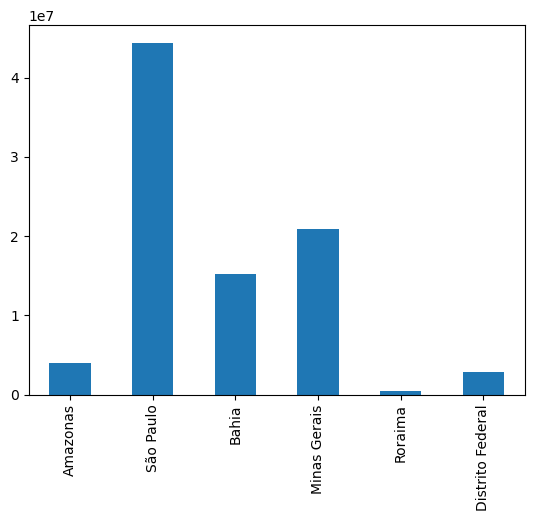

In [32]:
estadosBrasil['População'].plot(kind='bar');

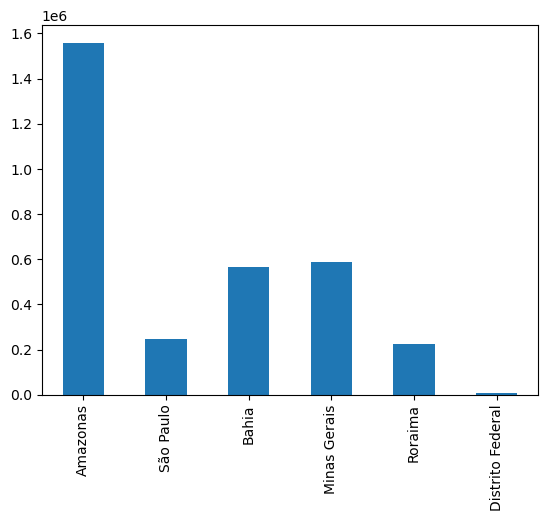

In [33]:
estadosBrasil['Área'].plot(kind='bar');

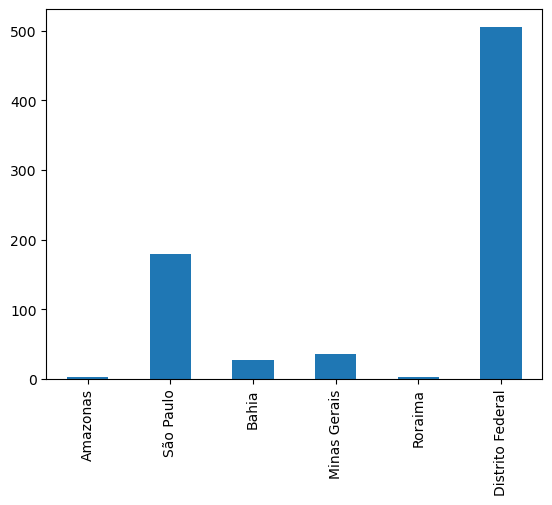

In [34]:
estadosBrasil['Densidade'].plot(kind='bar');